# Pokemon Analysis and Visualization

Analysis and Visualize `Pokemons` based on its Fighting Style
A Detailed Analysis on `Water, Fire, Grass Pokemons` 
### By [Tarun Jain](https://tarunjain.netlify.app) - [Anime Vyuh](https://animevyuh.org)

## Import Necessary Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
import squarify
warnings.filterwarnings('ignore')

### Read CSV File and Display Starting Data

In [2]:
dataset = pd.read_csv("pokemons dataset.csv")
dataset.head(10)

,Name,Name2,Primary Type,Secondary type,Attack,Defense,HP,Sp.Attack,Sp.Defense,Speed,Total
0,Bulbasaur,NaN,GRASS,POISON,49,49,45,65,65,45,318
1,Ivysaur,NaN,GRASS,POISON,62,63,60,80,80,60,405
2,Venusaur,NaN,GRASS,POISON,82,83,80,100,100,80,525
3,Venusaur,Mega Venusaur,GRASS,POISON,100,123,80,122,120,80,625
4,Charmander,NaN,FIRE,NaN,52,43,39,60,50,65,309
5,Charmeleon,NaN,FIRE,NaN,64,58,58,80,65,80,405
6,Charizard,NaN,FIRE,FLYING,84,78,78,109,85,100,534
7,Charizard,Mega Charizard X,FIRE,DRAGON,130,111,78,130,85,100,634
8,Charizard,Mega Charizard Y,FIRE,FLYING,104,78,78,159,115,100,634
9,Squirtle,NaN,WATER,NaN,48,65,44,50,64,43,314


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            1045 non-null   object
 1   Name2           175 non-null    object
 2   Primary Type    1045 non-null   object
 3   Secondary type  553 non-null    object
 4   Attack          1045 non-null   int64 
 5   Defense         1045 non-null   int64 
 6   HP              1045 non-null   int64 
 7   Sp.Attack       1045 non-null   int64 
 8   Sp.Defense      1045 non-null   int64 
 9   Speed           1045 non-null   int64 
 10  Total           1045 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 89.9+ KB


In [4]:
dataset.describe().T  #transpose

,count,mean,std,min,25%,50%,75%,max
Attack,1045.0,80.466986,32.413665,5.0,55.0,77.0,100.0,190.0
Defense,1045.0,74.661244,31.237903,5.0,50.0,70.0,90.0,250.0
HP,1045.0,70.067943,26.671411,1.0,50.0,68.0,82.0,255.0
Sp.Attack,1045.0,73.022010,32.724797,10.0,50.0,65.0,95.0,194.0
Sp.Defense,1045.0,72.288995,28.074148,20.0,50.0,70.0,90.0,250.0
Speed,1045.0,68.807656,30.210094,5.0,45.0,65.0,90.0,200.0
Total,1045.0,439.314833,121.970701,175.0,330.0,458.0,515.0,1125.0


In [5]:
dataset.describe()

,Attack,Defense,HP,Sp.Attack,Sp.Defense,Speed,Total
count,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000
mean,80.466986,74.661244,70.067943,73.022010,72.288995,68.807656,439.314833
std,32.413665,31.237903,26.671411,32.724797,28.074148,30.210094,121.970701
min,5.000000,5.000000,1.000000,10.000000,20.000000,5.000000,175.000000
25%,55.000000,50.000000,50.000000,50.000000,50.000000,45.000000,330.000000
50%,77.000000,70.000000,68.000000,65.000000,70.000000,65.000000,458.000000
75%,100.000000,90.000000,82.000000,95.000000,90.000000,90.000000,515.000000
max,190.000000,250.000000,255.000000,194.000000,250.000000,200.000000,1125.000000


In [6]:
dataset.isnull().sum()

Name                0
Name2             870
Primary Type        0
Secondary type    492
Attack              0
Defense             0
HP                  0
Sp.Attack           0
Sp.Defense          0
Speed               0
Total               0
dtype: int64

<AxesSubplot:>

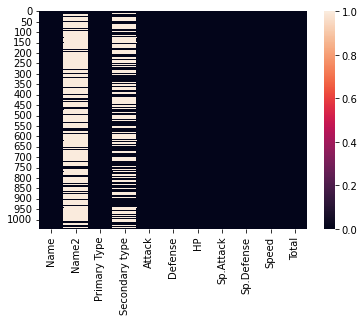

In [7]:
sb.heatmap(dataset.isnull())

**Name 1** as no null items, **Name 2** is another name for the `Pokemon`. This makes sense as well, some `Pokemon` no need another name. Let's Observe another column type. **Primary Type** is the Power Ability of the `Pokemon` which is their major strength. e.g., *Grass, Water, Fire, Lightening, Poison and many more*. **Secondary Type** are those `Pokemon` that as dual Power Ability. The Rest Columns are completely Filled and no null value is noticed. 

In [8]:
print("Unique Number Of Primary Type:{}".format(dataset['Primary Type'].nunique()))
print("Unique Number Of Secondary Type:{}".format(dataset['Secondary type'].nunique()))

Unique Number Of Primary Type:18
Unique Number Of Secondary Type:18


[Text(0.5, 0, 'Primary Type'), Text(0, 0.5, 'Count')]

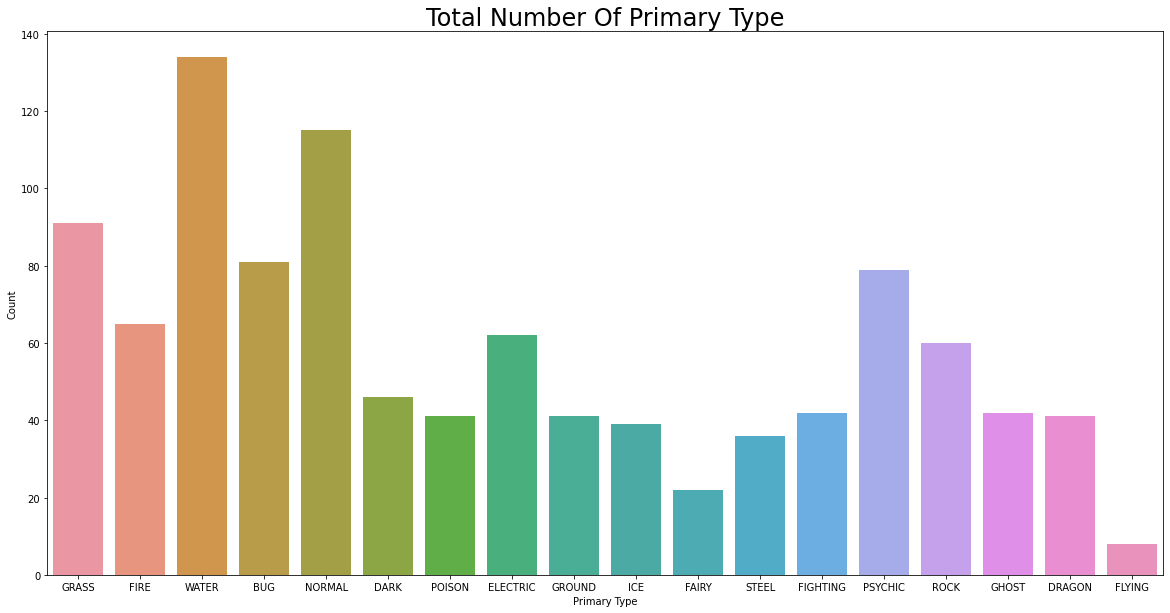

In [9]:
plt.figure(figsize=(20,10))
ax = sb.countplot(dataset['Primary Type'])
ax.set_title("Total Number Of Primary Type",fontsize=24)
ax.set(xlabel="Primary Type", ylabel="Count")

We have large number of ``Water Pokemon`` and least number of ``Flying Pokemon`` in the Primary Type Dataset 

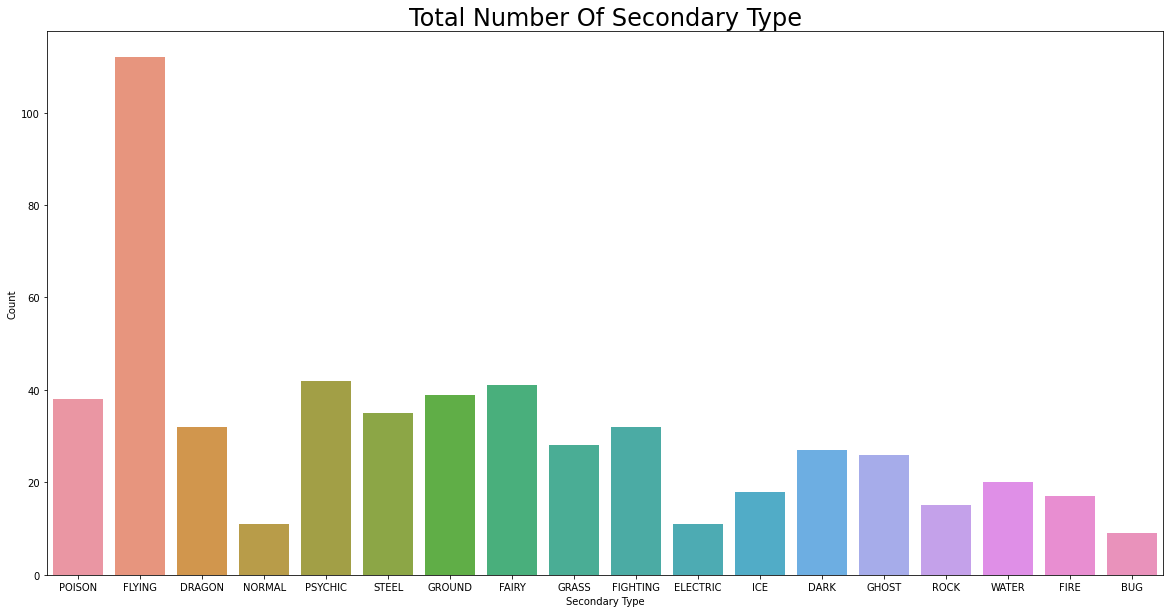

In [10]:
plt.figure(figsize=(20,10))
ax = sb.countplot(dataset['Secondary type'])
ax.set_title("Total Number Of Secondary Type",fontsize=24)
ax.set(xlabel="Secondary Type", ylabel="Count");

Since `Secondary Type` has many empty values, let's create a new column `type` that combines Primary And Secondary Pokemon.

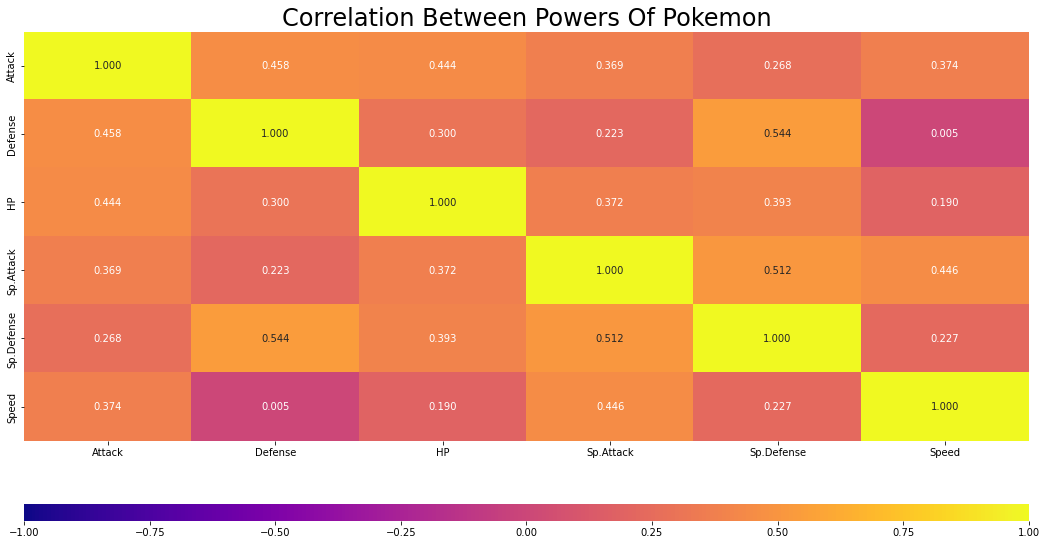

In [11]:
_,(ax, cbar_ax) = plt.subplots(2, gridspec_kw= {"height_ratios": (1, .04), "hspace":.3}, figsize=(18,9))
sb.heatmap((dataset.loc[:,['Attack','Defense','HP','Sp.Attack','Sp.Defense','Speed']]).corr(),
            annot= True,
            fmt = "3.3f",
            vmin = -1,
            vmax = 1,
            ax=ax,
            cbar_ax=cbar_ax,
            cbar_kws={"orientation": "horizontal"},
            cmap = "plasma")
ax.set_title('Correlation Between Powers Of Pokemon', size = 24);

### From the above Correlation Plot we can conclude that Speed and Defense as the worst relation between the, and Defense and Special Defence have a descent relationship

### Create a DataFrame

In [5]:
df = pd.DataFrame(dataset)

### The `Pokemon` with Highest Total

In [13]:
df[df['Total']==df['Total'].max()]

,Name,Name2,Primary Type,Secondary type,Attack,Defense,HP,Sp.Attack,Sp.Defense,Speed,Total
1033,Eternatus,Eternamax,POISON,DRAGON,115,250,255,125,250,130,1125


### What is the Primary Type and Secondary Type of the Highest Total `Pokemon`?

In [14]:
print(df[df['Total']==df['Total'].max()]['Primary Type'],'\n')
print(df[df['Total']==df['Total'].max()]['Secondary type'])

1033    POISON
Name: Primary Type, dtype: object 

1033    DRAGON
Name: Secondary type, dtype: object


### The `Pokemon` with Lowest Total

In [15]:
df[df['Total']==df['Total'].min()]

,Name,Name2,Primary Type,Secondary type,Attack,Defense,HP,Sp.Attack,Sp.Defense,Speed,Total
877,Wishiwashi,Solo Form,WATER,NaN,20,20,45,25,25,40,175


In [16]:
df[df['Attack']==df['Attack'].max()]

,Name,Name2,Primary Type,Secondary type,Attack,Defense,HP,Sp.Attack,Sp.Defense,Speed,Total
194,Mewtwo,Mega Mewtwo X,PSYCHIC,FIGHTING,190,100,106,154,100,130,780


### What is the Primary Type and Secondary Type of the Lowest Total `Pokemon`?

In [17]:
print(df[df['Total']==df.Total.min()]['Primary Type'],'\n')
print(df[df['Total']==df.Total.min()]['Secondary type'])

877    WATER
Name: Primary Type, dtype: object 

877    NaN
Name: Secondary type, dtype: object


## Filtering 

### Single Filter

For Single Filtering example let us first take all those `Pokemons` with attack more than 150. Second consider alll those `Pokemons` with Defense more than 150. Also try to play along. 

In [18]:
# Pokemon with Attack more than 150. Let's go
#method one
attack = df[df['Attack']>150]

In [19]:
attack.head(8)

,Name,Name2,Primary Type,Secondary type,Attack,Defense,HP,Sp.Attack,Sp.Defense,Speed,Total
164,Pinsir,Mega Pinsir,BUG,FLYING,155,120,65,65,90,105,600
168,Gyarados,Mega Gyarados,WATER,DARK,155,109,95,70,130,81,640
194,Mewtwo,Mega Mewtwo X,PSYCHIC,FIGHTING,190,100,106,154,100,130,780
264,Heracross,Mega Heracross,BUG,FIGHTING,185,115,80,40,105,75,600
301,Tyranitar,Mega Tyranitar,ROCK,DARK,164,150,100,95,120,71,700
312,Blaziken,Mega Blaziken,FIRE,FIGHTING,160,80,80,130,80,100,630
348,Slaking,NaN,NORMAL,NaN,160,100,150,95,65,100,670
425,Banette,Mega Banette,GHOST,NaN,165,75,64,93,83,75,555


In [20]:
#method 2
attack_2 = df['Attack'].map(lambda atk:atk>150)

In [21]:
df[attack_2]['Attack'].min()

155

In [22]:
#method 3
attack_pokemons = []
for atck in df['Attack']:
    if atck > 150:
        attack_pokemons.append(True)
    else:
        attack_pokemons.append(False)

attack_3 = pd.Series(attack_pokemons)
df[attack_3].head(8)

,Name,Name2,Primary Type,Secondary type,Attack,Defense,HP,Sp.Attack,Sp.Defense,Speed,Total
164,Pinsir,Mega Pinsir,BUG,FLYING,155,120,65,65,90,105,600
168,Gyarados,Mega Gyarados,WATER,DARK,155,109,95,70,130,81,640
194,Mewtwo,Mega Mewtwo X,PSYCHIC,FIGHTING,190,100,106,154,100,130,780
264,Heracross,Mega Heracross,BUG,FIGHTING,185,115,80,40,105,75,600
301,Tyranitar,Mega Tyranitar,ROCK,DARK,164,150,100,95,120,71,700
312,Blaziken,Mega Blaziken,FIRE,FIGHTING,160,80,80,130,80,100,630
348,Slaking,NaN,NORMAL,NaN,160,100,150,95,65,100,670
425,Banette,Mega Banette,GHOST,NaN,165,75,64,93,83,75,555


### Try the `Single Filtering` for Defense for practice

In [23]:
defense_more_than_150 = df[df['Defense']>150]

In [24]:
defense_more_than_150['Defense'].min()

152

In [25]:
#method 2
df[df['Defense'].map(lambda defense_150:defense_150 > 150)]

,Name,Name2,Primary Type,Secondary type,Attack,Defense,HP,Sp.Attack,Sp.Defense,Speed,Total
106,Slowbro,Mega Slowbro,WATER,PSYCHIC,75,180,95,130,80,30,590
121,Cloyster,NaN,WATER,ICE,95,180,50,85,45,70,525
126,Onix,NaN,ROCK,GROUND,45,160,35,30,45,70,385
255,Steelix,NaN,STEEL,GROUND,85,200,75,55,65,30,510
256,Steelix,Mega Steelix,STEEL,GROUND,125,230,75,55,95,30,610
262,Shuckle,NaN,BUG,ROCK,10,230,20,10,230,5,505
367,Aggron,NaN,STEEL,ROCK,110,180,70,60,60,50,530
368,Aggron,Mega Aggron,STEEL,NaN,140,230,70,60,80,50,630
452,Regirock,NaN,ROCK,NaN,100,200,80,50,100,50,580
462,Groudon,Primal Groudon,GROUND,FIRE,180,160,100,150,90,90,770


In [26]:
defense_150_method3 = []
for i in df['Defense']:
    if i>150:
        defense_150_method3.append(True)
    else:
        defense_150_method3.append(False)
        

In [27]:
defense = pd.Series(defense_150_method3)

In [28]:
df[defense]

,Name,Name2,Primary Type,Secondary type,Attack,Defense,HP,Sp.Attack,Sp.Defense,Speed,Total
106,Slowbro,Mega Slowbro,WATER,PSYCHIC,75,180,95,130,80,30,590
121,Cloyster,NaN,WATER,ICE,95,180,50,85,45,70,525
126,Onix,NaN,ROCK,GROUND,45,160,35,30,45,70,385
255,Steelix,NaN,STEEL,GROUND,85,200,75,55,65,30,510
256,Steelix,Mega Steelix,STEEL,GROUND,125,230,75,55,95,30,610
262,Shuckle,NaN,BUG,ROCK,10,230,20,10,230,5,505
367,Aggron,NaN,STEEL,ROCK,110,180,70,60,60,50,530
368,Aggron,Mega Aggron,STEEL,NaN,140,230,70,60,80,50,630
452,Regirock,NaN,ROCK,NaN,100,200,80,50,100,50,580
462,Groudon,Primal Groudon,GROUND,FIRE,180,160,100,150,90,90,770


### Muliple Filtering

Let us now consider those `Pokemons` with `Attack` and `Defense` both greater than `180` and `160` respectively 

In [29]:
#approach 1
attack_defense = df[(df['Attack']>180) & (df['Defense']>160)]
attack_defense.head(10)

,Name,Name2,Primary Type,Secondary type,Attack,Defense,HP,Sp.Attack,Sp.Defense,Speed,Total


Oops! It seems there is no `Pokemon` in data satisfying the condition. Don't get me wrong as we are not considering the special attack and special defence to make the `Pokemon` powerful. For time being let us try `Attack` and `Defense` to be more than 100

In [30]:
attack_defense = df[(df['Attack']>100) & (df['Defense']>100)]
attack_defense.head(10)

,Name,Name2,Primary Type,Secondary type,Attack,Defense,HP,Sp.Attack,Sp.Defense,Speed,Total
7,Charizard,Mega Charizard X,FIRE,DRAGON,130,111,78,130,85,100,634
12,Blastoise,Mega Blastoise,WATER,NaN,103,120,79,135,115,78,630
97,Golem,NaN,ROCK,GROUND,120,130,80,55,65,45,495
98,Golem,Alolan Golem,ROCK,ELECTRIC,120,130,80,55,65,45,495
130,Kingler,NaN,WATER,NaN,130,115,55,50,50,75,475
146,Rhydon,NaN,GROUND,ROCK,130,120,105,45,45,40,485
164,Pinsir,Mega Pinsir,BUG,FLYING,155,120,65,65,90,105,600
168,Gyarados,Mega Gyarados,WATER,DARK,155,109,95,70,130,81,640
180,Kabutops,NaN,ROCK,WATER,115,105,60,65,70,80,495
256,Steelix,Mega Steelix,STEEL,GROUND,125,230,75,55,95,30,610


### Check those `Pokemon` that belongs to two `Type`

In [31]:
fire_water = df[(df["Primary Type"]=="FIRE") & (df['Secondary type']=="WATER")]
fire_water.head(10)

,Name,Name2,Primary Type,Secondary type,Attack,Defense,HP,Sp.Attack,Sp.Defense,Speed,Total
846,Volcanion,NaN,FIRE,WATER,110,120,80,130,90,70,600


In [32]:
water_fire = df[(df["Primary Type"]=="WATER") & (df['Secondary type']=="FIRE")]
water_fire.head(10)

,Name,Name2,Primary Type,Secondary type,Attack,Defense,HP,Sp.Attack,Sp.Defense,Speed,Total


In [33]:
water_poison = df[(df["Primary Type"]=="WATER") & (df['Secondary type']=="POISON")]
water_poison.head(10)

,Name,Name2,Primary Type,Secondary type,Attack,Defense,HP,Sp.Attack,Sp.Defense,Speed,Total
91,Tentacool,NaN,WATER,POISON,40,35,40,50,100,70,335
92,Tentacruel,NaN,WATER,POISON,70,65,80,80,120,100,515
259,Qwilfish,NaN,WATER,POISON,95,85,65,55,55,85,440


In [34]:
poison_w = df[(df["Primary Type"]=="POISON") & (df['Secondary type']=="WATER")]
poison_w.head(10)

,Name,Name2,Primary Type,Secondary type,Attack,Defense,HP,Sp.Attack,Sp.Defense,Speed,Total
805,Skrelp,NaN,POISON,WATER,60,60,50,60,60,30,320
879,Mareanie,NaN,POISON,WATER,53,62,50,43,52,45,305
880,Toxapex,NaN,POISON,WATER,63,152,50,53,142,35,495


In [35]:
check = df[(df['Primary Type']=="FIRE") & (df['Secondary type']=="DRAGON")]
check

,Name,Name2,Primary Type,Secondary type,Attack,Defense,HP,Sp.Attack,Sp.Defense,Speed,Total
7,Charizard,Mega Charizard X,FIRE,DRAGON,130,111,78,130,85,100,634
909,Turtonator,NaN,FIRE,DRAGON,78,135,60,91,85,36,485


## Visualization

Before we get into plotting graphs let us know how to deal with `groupby` method.

In [36]:
df.head(10)

,Name,Name2,Primary Type,Secondary type,Attack,Defense,HP,Sp.Attack,Sp.Defense,Speed,Total
0,Bulbasaur,NaN,GRASS,POISON,49,49,45,65,65,45,318
1,Ivysaur,NaN,GRASS,POISON,62,63,60,80,80,60,405
2,Venusaur,NaN,GRASS,POISON,82,83,80,100,100,80,525
3,Venusaur,Mega Venusaur,GRASS,POISON,100,123,80,122,120,80,625
4,Charmander,NaN,FIRE,NaN,52,43,39,60,50,65,309
5,Charmeleon,NaN,FIRE,NaN,64,58,58,80,65,80,405
6,Charizard,NaN,FIRE,FLYING,84,78,78,109,85,100,534
7,Charizard,Mega Charizard X,FIRE,DRAGON,130,111,78,130,85,100,634
8,Charizard,Mega Charizard Y,FIRE,FLYING,104,78,78,159,115,100,634
9,Squirtle,NaN,WATER,NaN,48,65,44,50,64,43,314


### Ultimate `groupby` use

In [37]:
print("Bug Minimum(Primary):",df.groupby("Primary Type")["Total"].min()["BUG"])  #min bug total in Primary type
print("Fire Min(Sec):",df.groupby("Secondary type")["Total"].min()["FIRE"])
print("Water Mean(Pri):",df.groupby("Primary Type")["Total"].mean()["WATER"])
print("Lightening Count(Sec):",df.groupby("Secondary type")["Total"].count()["ELECTRIC"])

Bug Minimum(Primary): 180
Fire Min(Sec): 275
Water Mean(Pri): 431.73880597014926
Lightening Count(Sec): 11


In [38]:
df[df['Secondary type']=='ELECTRIC']   #you can verify the the group by count method

,Name,Name2,Primary Type,Secondary type,Attack,Defense,HP,Sp.Attack,Sp.Defense,Speed,Total
94,Geodude,Alolan Geodude,ROCK,ELECTRIC,80,100,40,30,30,20,300
96,Graveler,Alolan Graveler,ROCK,ELECTRIC,95,115,55,45,45,35,390
98,Golem,Alolan Golem,ROCK,ELECTRIC,120,130,80,55,65,45,495
215,Chinchou,NaN,WATER,ELECTRIC,38,38,75,56,56,67,330
216,Lanturn,NaN,WATER,ELECTRIC,58,58,125,76,76,67,460
699,Joltik,NaN,BUG,ELECTRIC,47,50,50,57,50,65,319
700,Galvantula,NaN,BUG,ELECTRIC,77,60,70,97,60,108,472
722,Stunfisk,NaN,GROUND,ELECTRIC,66,84,109,81,99,32,471
751,Zekrom,NaN,DRAGON,ELECTRIC,150,120,100,120,100,90,680
862,Charjabug,NaN,BUG,ELECTRIC,82,95,57,55,75,36,400


Check ``groupby`` method of Primary and Seconday Type `Pokemon` and ``Plot a Bar``Graph

<AxesSubplot:title={'center':'Secondary Type'}, ylabel='Secondary type'>

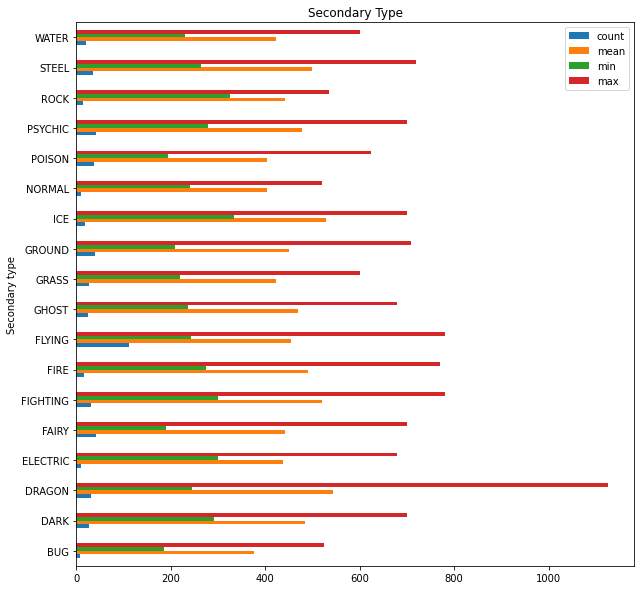

In [39]:
df.groupby("Secondary type")["Total"].agg(["count","mean","min","max"]).plot(kind="barh",figsize=(10,10),title="Secondary Type")

<AxesSubplot:title={'center':'Primary Type'}, ylabel='Primary Type'>

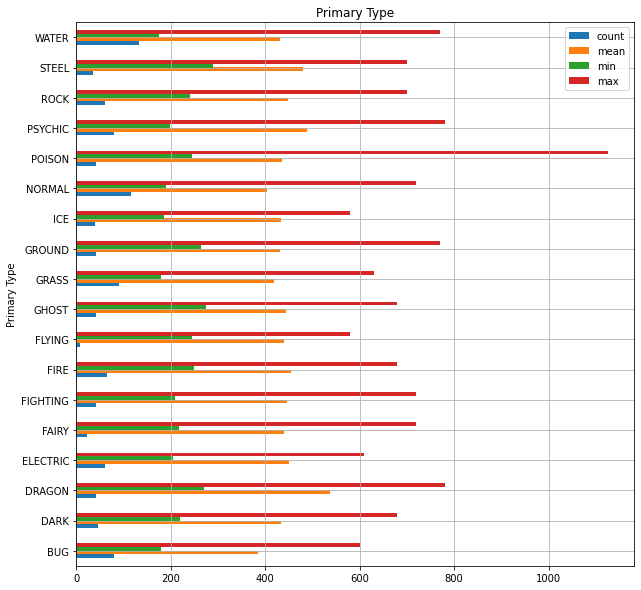

In [40]:
df.groupby('Primary Type')['Total'].agg(['count','mean','min','max']).plot(kind="barh",figsize=(10,10),title="Primary Type",grid=True)

<AxesSubplot:title={'center':'Primary Type Pokemon Attack Analysis'}, xlabel='Primary Type'>

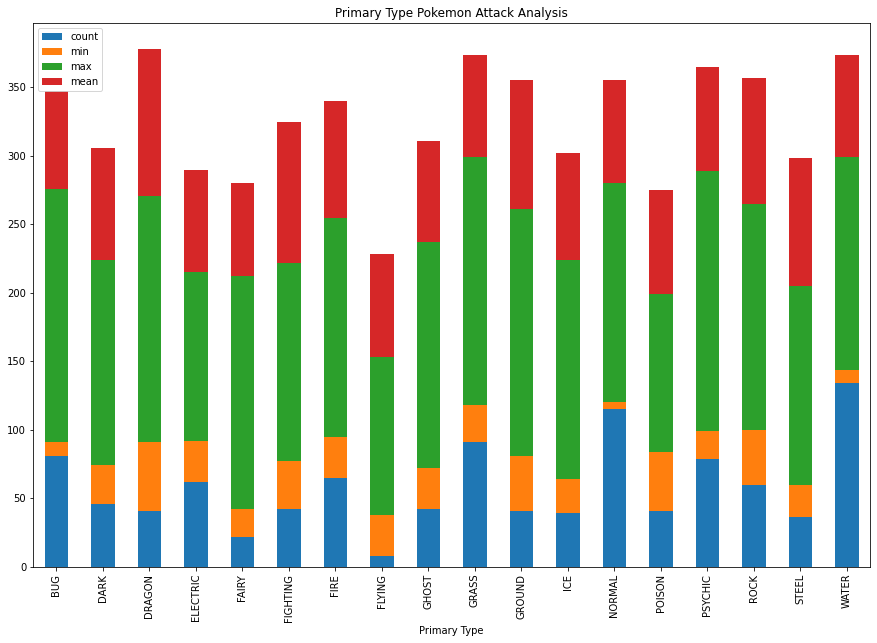

In [41]:
df.groupby('Primary Type')['Attack'].agg(['count','min','max','mean']).plot(kind="bar",stacked=True,figsize=(15,10),title="Primary Type Pokemon Attack Analysis")

### `Water Pokemon Visualization`

#### Let us individually visualize few `Primary Type Pokemons`

In [42]:
water_pokemons = df[df['Primary Type']=='WATER']

In [43]:
water_pokemons.shape

(134, 11)

Check the `Pokemon` with the highest Total among the ``Water Pokemon``

In [44]:
water_pokemons[water_pokemons["Total"]==water_pokemons["Total"].max()]

,Name,Name2,Primary Type,Secondary type,Attack,Defense,HP,Sp.Attack,Sp.Defense,Speed,Total
460,Kyogre,Primal Kyogre,WATER,NaN,150,90,100,180,160,90,770


In [45]:
water_pokemons_names = df[(df['Primary Type']=="WATER") & (df['Total']>500)] ["Name"]
water_strength = df[(df['Primary Type']=="WATER") & (df['Total']>500)].Total

Text(0, 0.5, 'Total')

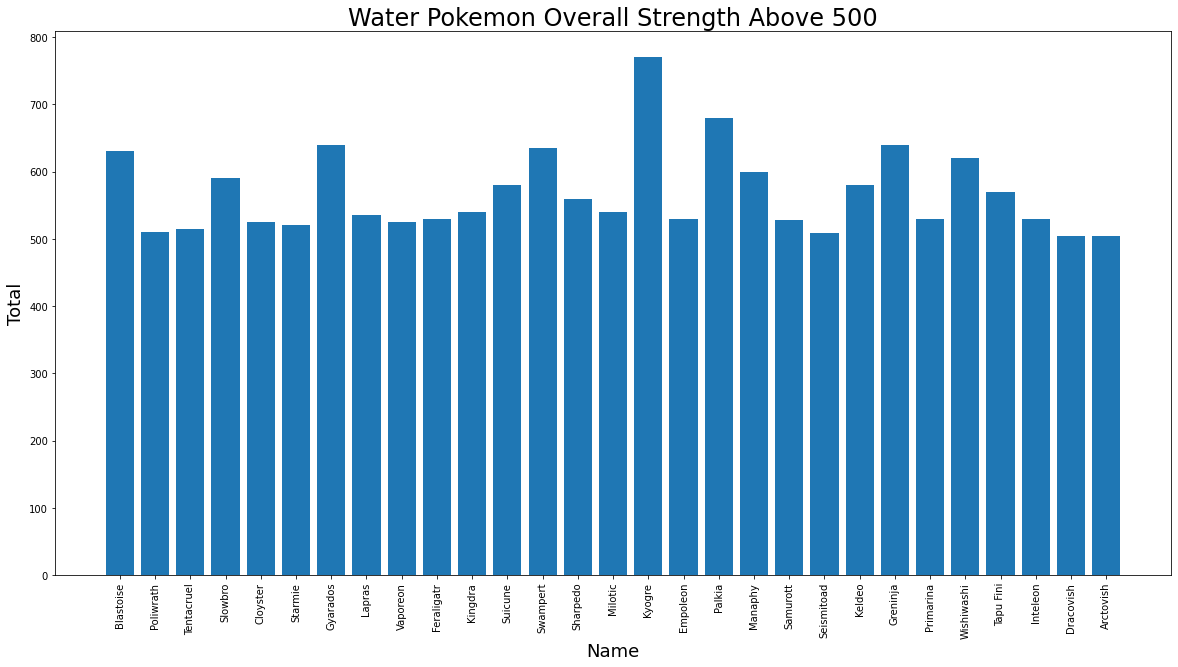

In [46]:
plt.figure(figsize=(20,10))
plt.title("Water Pokemon Overall Strength Above 500",fontsize=24)
plt.bar(water_pokemons_names,water_strength)
plt.xticks(rotation=90)
plt.xlabel("Name",fontsize=18)
plt.ylabel("Total",fontsize=18)

Text(0, 0.5, 'Fire Pokemons')

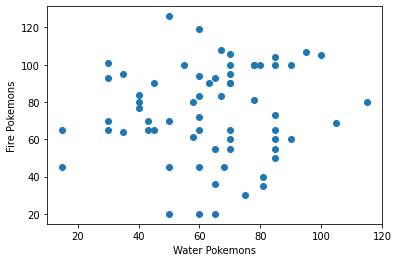

In [47]:
plt.scatter(df[df["Primary Type"]=="WATER"]["Speed"].iloc[0:65],df[df["Primary Type"]=="FIRE"]["Speed"])
plt.xlabel("Water Pokemons")
plt.ylabel("Fire Pokemons")

([<matplotlib.patches.Wedge at 0x7fe8fb8834c0>,
 [Text(1.0472594673823652, 0.33652281940160444, 'Starmie'),
  Text(0.6788408649030252, 0.8655490050469198, 'Sharpedo'),
  Text(0.07725951604503745, 1.0972834488774934, 'Floatzel'),
  Text(-0.5405295304151658, 0.9580333119203948, 'Simipour'),
  Text(-0.9694993821421932, 0.5196835075561911, 'Keldeo'),
  Text(-1.0953558930304859, -0.10097260818354195, 'Keldeo'),
  Text(-0.8315015648749688, -0.7201424495268128, 'Greninja'),
  Text(-0.1864554588651674, -1.0840822671086268, 'Greninja'),
  Text(0.5379373617831071, -0.9594912166340194, 'Inteleon'),
  Text(1.026475914168127, -0.39540763476785323, 'Barraskewda')],
 [Text(0.5712324367540174, 0.18355790149178422, '9.897%'),
  Text(0.3702768354016501, 0.4721176391165016, '9.036%'),
  Text(0.04214155420638405, 0.5985182448422691, '9.897%'),
  Text(-0.2948342893173631, 0.5225636246838516, '8.692%'),
  Text(-0.5288178448048326, 0.28346373139428604, '9.294%'),
  Text(-0.5974668507439013, -0.05507596810011

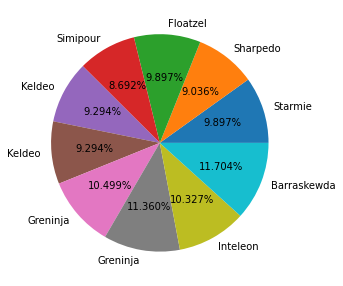

In [48]:
plt.figure(figsize=(8,5))
plt.pie(water_pokemons[water_pokemons['Speed']>100]["Speed"],labels=water_pokemons[water_pokemons["Speed"]>100]["Name"],autopct='%1.3f%%')

Text(0, 0.5, 'Count Range')

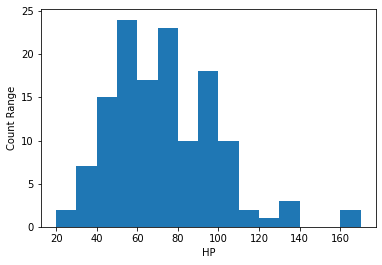

In [82]:
plt.hist(water_pokemons['HP'],bins=15)
plt.xlabel("HP")
plt.ylabel("Count Range")

In [85]:
water_pokemons['HP'].median()

70.0

In [79]:
plt.hist?

### `Fire Pokemon Visualization`

In [50]:
fire_pokemons = df[df['Primary Type']=="FIRE"]

In [51]:
fire_pokemons.head()

,Name,Name2,Primary Type,Secondary type,Attack,Defense,HP,Sp.Attack,Sp.Defense,Speed,Total
4,Charmander,NaN,FIRE,NaN,52,43,39,60,50,65,309
5,Charmeleon,NaN,FIRE,NaN,64,58,58,80,65,80,405
6,Charizard,NaN,FIRE,FLYING,84,78,78,109,85,100,534
7,Charizard,Mega Charizard X,FIRE,DRAGON,130,111,78,130,85,100,634
8,Charizard,Mega Charizard Y,FIRE,FLYING,104,78,78,159,115,100,634


In [52]:
print(water_pokemons['Speed'].shape)
print(fire_pokemons['Speed'].shape)

(134,)
(65,)


In [53]:
fire_pokemons.isnull().sum()

Name               0
Name2             56
Primary Type       0
Secondary type    34
Attack             0
Defense            0
HP                 0
Sp.Attack          0
Sp.Defense         0
Speed              0
Total              0
dtype: int64

#### Check Out the Speed Relationship between `Water and Fire Pokemon` 

In [54]:
fastest_fire_poke = fire_pokemons['Speed'].sort_values()[::-1].iloc[0:15]

In [55]:
fastest_water_poke = water_pokemons['Speed'].sort_values()[::-1].iloc[0:15]
fastest_fire_poke

776    126
951    119
475    108
942    107
781    106
101    105
767    104
611    101
296    100
312    100
202    100
6      100
50     100
8      100
7      100
Name: Speed, dtype: int64

Text(0, 0.5, 'Top 15 Fastest Fire Pokemons Speed')

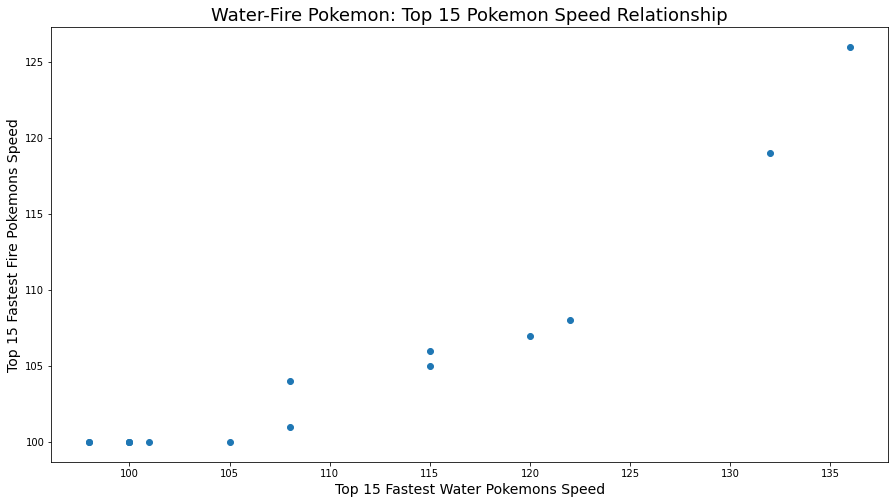

In [56]:
plt.figure(figsize=(15,8))
plt.scatter(fastest_water_poke,fastest_fire_poke)
plt.title("Water-Fire Pokemon: Top 15 Pokemon Speed Relationship",fontsize=18)
plt.xlabel("Top 15 Fastest Water Pokemons Speed",fontsize=14)
plt.ylabel("Top 15 Fastest Fire Pokemons Speed",fontsize=14)

### `Lightening Pokemon Visualization`

As we know our favourite `Pikachu` belongs to Electric/Lightening, lets extract a single player data

In [57]:
pika = df[df['Name']=="Pikachu"]
pika.set_index("Name",inplace=True)

### Analysis Pikachu

In [58]:
pika["Total"]

Name
Pikachu    320
Pikachu    430
Name: Total, dtype: int64

Text(0, 0.5, 'Strength')

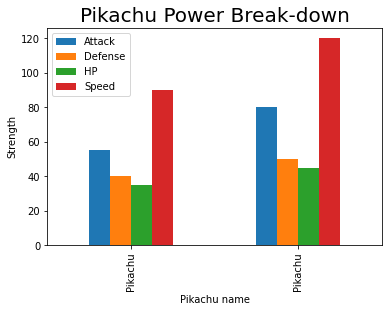

In [59]:
ax = pika.loc[:,["Attack","Defense","HP","Speed"]].plot(kind="bar")
ax.set_title("Pikachu Power Break-down",fontsize=20)
ax.set_xlabel("Pikachu name")
ax.set_ylabel("Strength")

### `Grass Pokemon Visualization`

#### `Practice: by seeing above analysis, I hope you can try this. Gunbate.`

In [60]:
grass_pokemon = df[df['Primary Type'] == 'GRASS']
grass_pokemon.head()

,Name,Name2,Primary Type,Secondary type,Attack,Defense,HP,Sp.Attack,Sp.Defense,Speed,Total
0,Bulbasaur,NaN,GRASS,POISON,49,49,45,65,65,45,318
1,Ivysaur,NaN,GRASS,POISON,62,63,60,80,80,60,405
2,Venusaur,NaN,GRASS,POISON,82,83,80,100,100,80,525
3,Venusaur,Mega Venusaur,GRASS,POISON,100,123,80,122,120,80,625
56,Oddish,NaN,GRASS,POISON,50,55,45,75,65,30,320


In [61]:
#your code from here

In [62]:
plt.xticks?

### `Flying Pokemon Visualization`

#### `Practice: by seeing above analysis, I hope you can try this. Gunbate.`

In [63]:
flying_pokemon = df[df['Primary Type'] == 'FLYING']
flying_pokemon.head()

,Name,Name2,Primary Type,Secondary type,Attack,Defense,HP,Sp.Attack,Sp.Defense,Speed,Total
746,Tornadus,Incarnate Forme,FLYING,NaN,115,70,79,125,80,111,580
747,Tornadus,Therian Forme,FLYING,NaN,100,80,79,110,90,121,580
835,Noibat,NaN,FLYING,DRAGON,30,35,40,45,40,55,245
836,Noivern,NaN,FLYING,DRAGON,70,80,85,97,80,123,535
957,Rookidee,NaN,FLYING,NaN,47,35,38,33,35,57,245


In [64]:
flying_dragon =  df[(df['Primary Type']=="FLYING") & (df['Secondary type']=='DRAGON')]
dragon_flying = df[(df['Secondary type']=="FLYING") & (df['Primary Type']=='DRAGON')]

In [65]:
dragon_flying

,Name,Name2,Primary Type,Secondary type,Attack,Defense,HP,Sp.Attack,Sp.Defense,Speed,Total
192,Dragonite,NaN,DRAGON,FLYING,134,95,91,100,100,80,600
400,Altaria,NaN,DRAGON,FLYING,70,90,75,70,105,80,490
446,Salamence,NaN,DRAGON,FLYING,135,80,95,110,80,100,600
447,Salamence,Mega Salamence,DRAGON,FLYING,145,130,95,120,90,120,700
463,Rayquaza,NaN,DRAGON,FLYING,150,90,105,150,90,95,680
464,Rayquaza,Mega Rayquaza,DRAGON,FLYING,180,100,105,180,100,115,780


In [66]:
flying_dragon

,Name,Name2,Primary Type,Secondary type,Attack,Defense,HP,Sp.Attack,Sp.Defense,Speed,Total
835,Noibat,NaN,FLYING,DRAGON,30,35,40,45,40,55,245
836,Noivern,NaN,FLYING,DRAGON,70,80,85,97,80,123,535


### Merge Two DataFrames

In [67]:
dragon = pd.concat([flying_dragon,dragon_flying])

In [68]:
dragon

,Name,Name2,Primary Type,Secondary type,Attack,Defense,HP,Sp.Attack,Sp.Defense,Speed,Total
835,Noibat,NaN,FLYING,DRAGON,30,35,40,45,40,55,245
836,Noivern,NaN,FLYING,DRAGON,70,80,85,97,80,123,535
192,Dragonite,NaN,DRAGON,FLYING,134,95,91,100,100,80,600
400,Altaria,NaN,DRAGON,FLYING,70,90,75,70,105,80,490
446,Salamence,NaN,DRAGON,FLYING,135,80,95,110,80,100,600
447,Salamence,Mega Salamence,DRAGON,FLYING,145,130,95,120,90,120,700
463,Rayquaza,NaN,DRAGON,FLYING,150,90,105,150,90,95,680
464,Rayquaza,Mega Rayquaza,DRAGON,FLYING,180,100,105,180,100,115,780


In [69]:
print("We have total of {} dragons that can fly".format(len(dragon)))

We have total of 8 dragons that can fly


In [70]:
#your code from here

### Top Pokemon Analysis And Battle

In [6]:
top20_pokemon = df.loc[:,["Name","Total",'Primary Type']].sort_values(by="Total", ascending=False)[:20]

In [7]:
top20_pokemon.set_index("Name",inplace=True)

<AxesSubplot:title={'center':'Top 20 Pokemon Total Strength'}, xlabel='Name', ylabel='Total'>

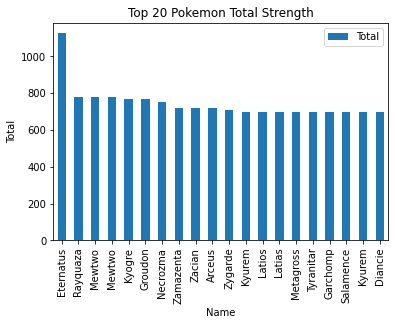

In [8]:
top20_pokemon.plot(kind="bar",stacked=True,ylabel="Total",title="Top 20 Pokemon Total Strength")

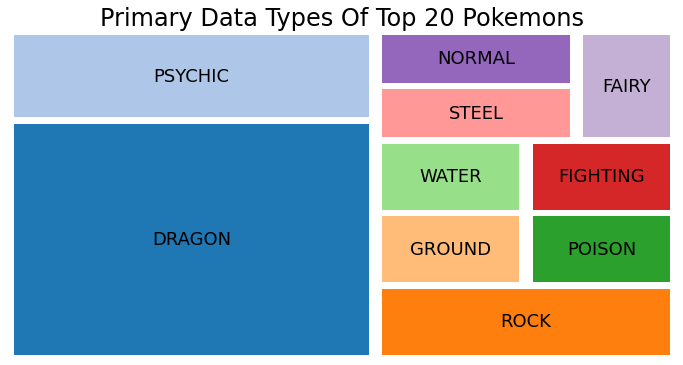

In [15]:
plt.figure(figsize=(12,6))
plt.axis("off")
axis = squarify.plot(top20_pokemon['Primary Type'].value_counts(), 
              label=top20_pokemon['Primary Type'].value_counts().index,
              color=sb.color_palette("tab20", len(top20_pokemon['Primary Type'].value_counts())),
              pad=1,
              text_kwargs={'fontsize': 18})
axis.set_title("Primary Data Types Of Top 20 Pokemons",fontsize=24)
plt.savefig("pokemon.png")

In [76]:
df['Total'].groupby?

Object `groupby` not found.


In [77]:
df['Total'].groupby?

Object `groupby` not found.


In [78]:
df.groupby?

In [86]:
df.dropna(how="any",inplace=True)

In [87]:
df.dropna(how="all",inplace=True)

In [ ]:
df.drop(column_name,inplace=True)
df.drop([column1.column2],inplace=True)

(0.0, 100.0, 0.0, 100.0)

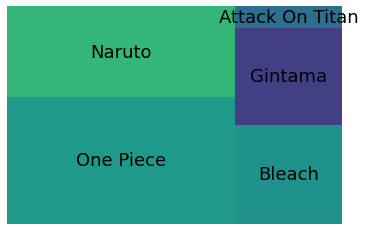

In [3]:
episode_data = [1004,720,366,360,80]
anime_names = ["One Piece","Naruto","Bleach","Gintama","Attack On Titan"]
squarify.plot(episode_data,label=anime_names,text_kwargs={'fontsize': 18})
plt.axis("off")
